# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [112]:
colors_df = pd.read_csv("./data/colors.csv")

In [113]:
colors_df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [114]:
count_transparent = int(colors_df[colors_df['is_trans'] == 't']['is_trans'].count())
count_opaque = int(colors_df[colors_df['is_trans'] == 'f']['is_trans'].count())

print(f"transparent = {count_transparent}")
print(f"opaque = {count_opaque}")

transparent = 28
opaque = 107


In [115]:
colors_df['is_trans'].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

![image](https://i.imgur.com/aKcwkSx.png)

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

![sets](https://i.imgur.com/whB1olq.png)

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [116]:
sets_df = pd.read_csv("./data/sets.csv")

In [117]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [118]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [119]:
sets_df.sort_values(by=['year'])

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178
...,...,...,...,...,...
5837,45030-1,People,2020,516,44
15174,ICECREAMTRUCK-1,Ice Cream Truck,2020,494,60
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [120]:
c1 = sets_df[sets_df['year'] == sets_df['year'].min()]
c1

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [121]:
c1.count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [122]:
sets_df.sort_values(by=['num_parts'], ascending=False)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
...,...,...,...,...,...
15669,tsuper-1,Technic Super Set,1991,12,0
11,005-2,Discovery Set,1967,366,0
15700,WEETABIX5-1,Weetabix Promotional Lego Village,1976,413,0
15693,W991526-1,Homeschool Introduction to Simple and Motorize...,2009,529,0


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [123]:
sets_df.groupby("year").count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


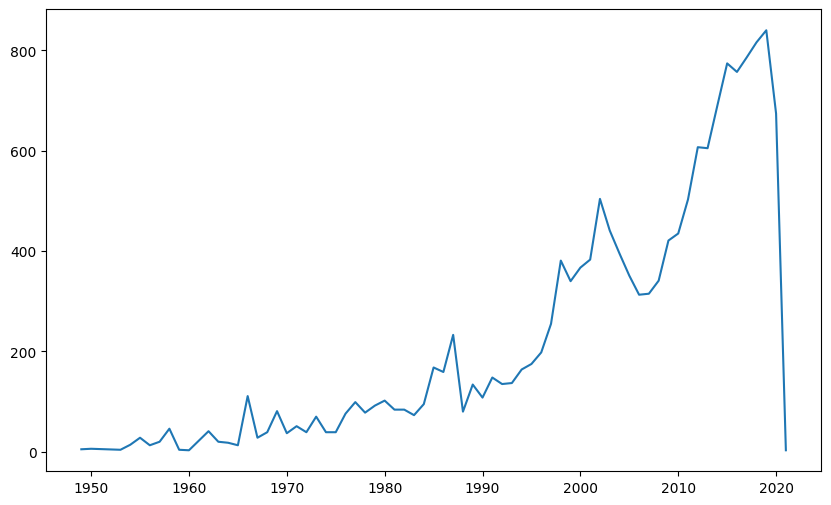

In [124]:
sets_by_year = sets_df.groupby('year').count()
plt.figure(figsize=(10, 6))
plt.plot(sets_by_year.index, sets_by_year['num_parts'])
plt.show()

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

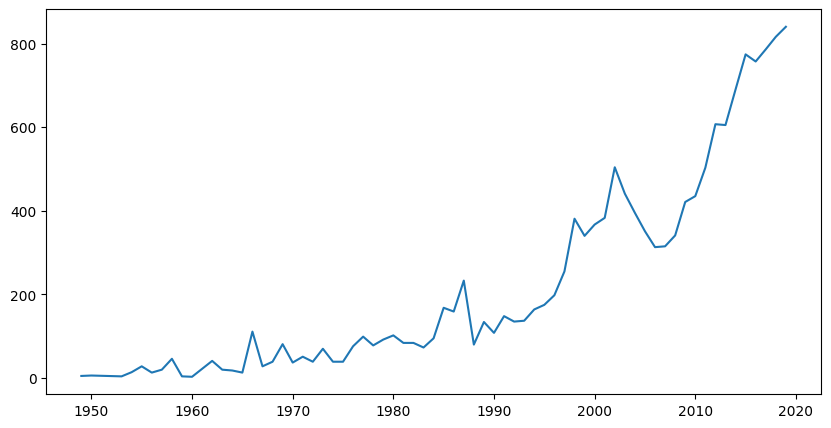

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(sets_by_year.index[:-2], sets_by_year['num_parts'][:-2])
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [126]:
themes_by_year = sets_df.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_by_year.rename(columns={"theme_id":"nr_themes"}, inplace=True)

In [127]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

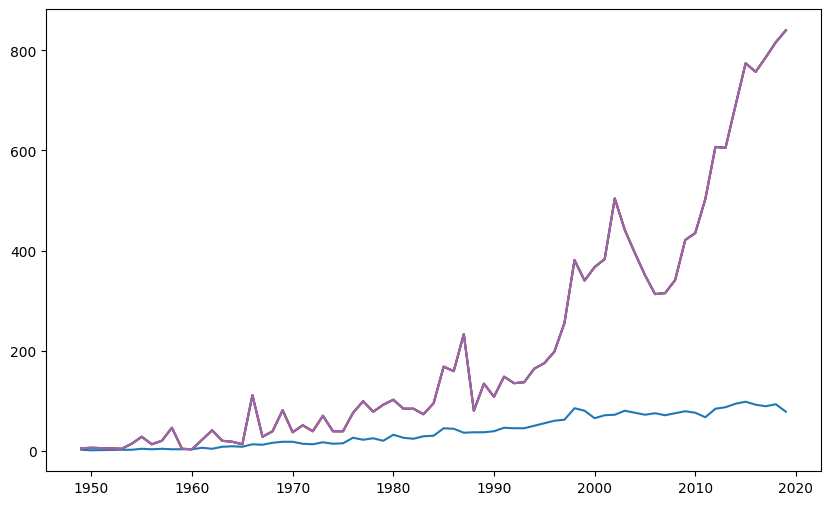

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], sets_by_year[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'themes')

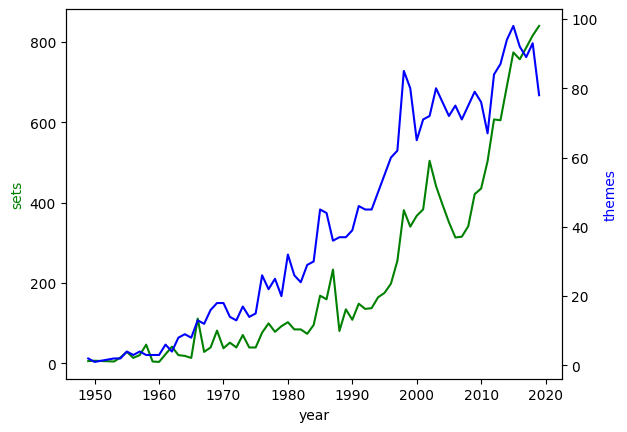

In [129]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], c='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], c='b')
ax1.set_xlabel("year")
ax1.set_ylabel("sets", c='g')
ax2.set_ylabel("themes", c='b')


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [130]:
parts_per_set = sets_df.groupby("year").agg({"num_parts":pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

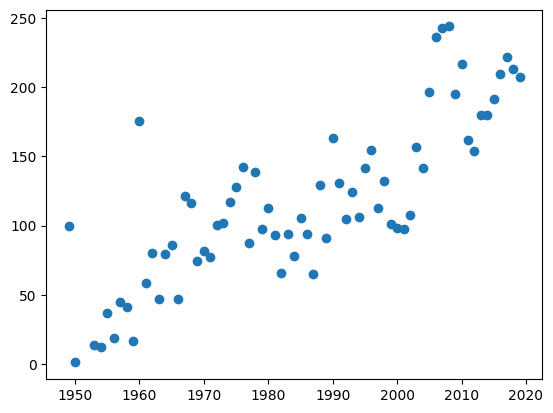

In [131]:
plt.scatter(x=parts_per_set.index[:-2], y=parts_per_set['num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

![db schema](https://i.imgur.com/Sg4lcjx.png)

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [134]:
themes_df[themes_df['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [151]:
sets_df[sets_df['theme_id'] == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [152]:
sets_theme_count = sets_df['theme_id'].value_counts()
sets_theme_count

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
512      1
370      1
34       1
475      1
414      1
Name: count, Length: 571, dtype: int64

In [153]:
sets_theme_count = pd.DataFrame({
    "id":sets_theme_count.index,
    "set_count":sets_theme_count.values
})
sets_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,512,1
567,370,1
568,34,1
569,475,1


### Merging (i.e., Combining) DataFrames based on a Key


In [154]:
merged_df = pd.merge(sets_theme_count, themes_df, on='id')

In [155]:
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,512,1,Castle,507.0
567,370,1,Mosaic,365.0
568,34,1,Building,23.0
569,475,1,Western,NaN


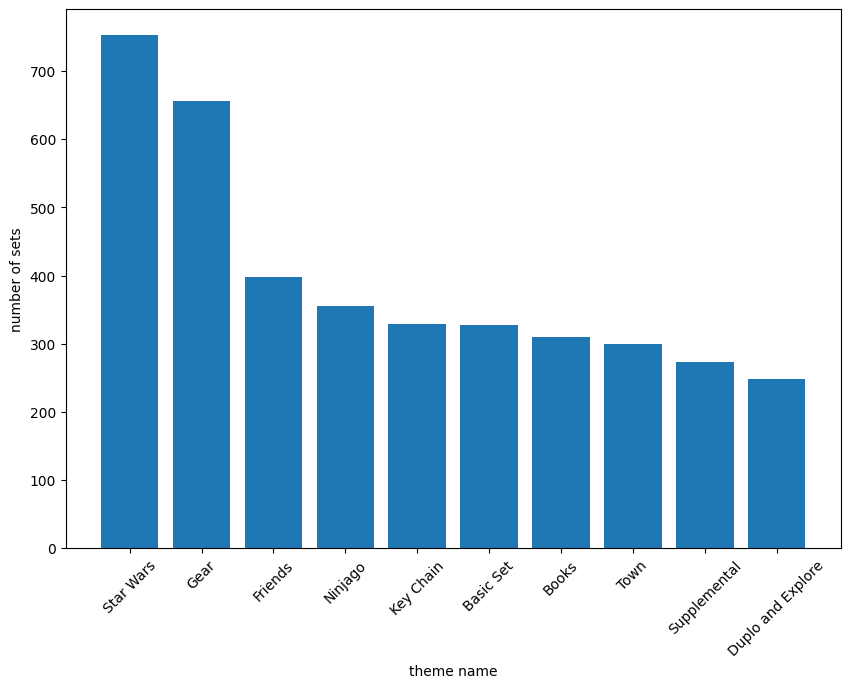

In [162]:
plt.figure(figsize=(10, 7))
plt.xlabel("theme name")
plt.ylabel("number of sets")
plt.xticks(rotation=45)
plt.bar(merged_df['name'][:10], merged_df['set_count'][:10])
plt.show()